# Regression Analysis  - Poverty Dataset
Author - Prajakta Gaydhani

In [1]:
import pandas as pd                #data manipulation 
import numpy as np                 #data manipulation 
import matplotlib.pyplot as plt    #data visualization
import seaborn as sns              #data visualization
import math
%matplotlib inline
import warnings
from astropy.io import fits
warnings.filterwarnings('ignore', category=UserWarning, append=True)

## 1. Read Poverty Dataset

In [3]:
train = pd.read_csv('cleaned.csv')
train.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,0,0,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,0
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1,0,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,0
2,ID_68de51c94,0.0,0,8,0,1,1,0,0,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,0
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1,0,...,81,289,16,121,4,1.777778,1.0,121.0,289,0
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1,0,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,0


## 2. Regression Analysis using Scikit Learn and Seaborn library for Python

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.metrics import r2_score

#### 2.1 Regression Analysis - Avg. Education 18+ vs Poverty Levels

[ 1. 12.]
0.1139365477542379


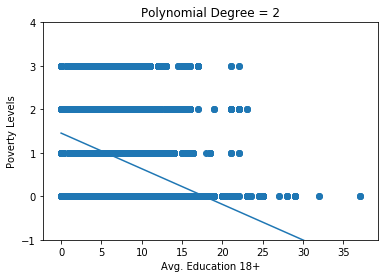

In [22]:
#SQBmeaned
y2 = train.Target
X = train.meaneduc

plt.ylim(-1,4,1)
poly_features = PolynomialFeatures(degree = 1)  
X_poly = poly_features.fit_transform(X.values.reshape(-1,1))
print(X_poly[1])
poly_model = LinearRegression() 
poly_model.fit(X_poly, y2)

pred = poly_model.predict(X_poly)
print(r2_score(y2,pred))
new_X, new_y = zip(*sorted(zip(X, pred))) # sort values for plotting
plt.plot(new_X, new_y)
plt.scatter(X,y2)
plt.xlabel("Avg. Education 18+")
plt.ylabel("Poverty Levels")
plt.title("Polynomial Degree = 2");


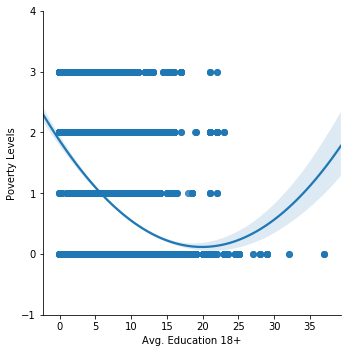

In [88]:
sns.lmplot(x="meaneduc", y="Target", data=train, x_jitter=.03,  order =2)
plt.ylim(-1,4,1)
plt.xlabel("Avg. Education 18+")
plt.ylabel("Poverty Levels");

#### 2.2  Regression Analysis - number of persons living in the household  vs Size of Household

In [5]:
def regression(X,y2,d, color1, color2, jitter):
    
    #poly regresison
    poly_features = PolynomialFeatures(degree = d)  
    #generates vector of dim d
    X_poly = poly_features.fit_transform(X.values.reshape(-1,1))
    #printing vector
    print(X_poly[4])
    
    #regression analysis
    poly_model = LinearRegression() 
    poly_model.fit(X_poly, y2)
    pred = poly_model.predict(X_poly)
    new_X, new_y = zip(*sorted(zip(X, pred))) # sort values for plotting
    print(r2_score(y2, pred))
    #plotting regression
    plt.plot(new_X, new_y, color  = color1)
    sns.stripplot(X,y2, color = color2, jitter = jitter,dodge = True)

[ 1.  4. 16.]
0.9005798857813684


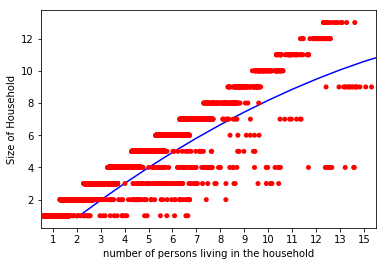

In [7]:
#no of persons living in the house ~~ size of the house
regression(train.tamviv, train.hhsize, 2, "blue", "red", 0.7)
plt.ylabel("Size of Household")
plt.xlabel("number of persons living in the household");

#### 2.3   Regression Analysis - Number of children 0 to 19 in household  vs Poverty Levels

[1. 2.]
0.10770877479692498


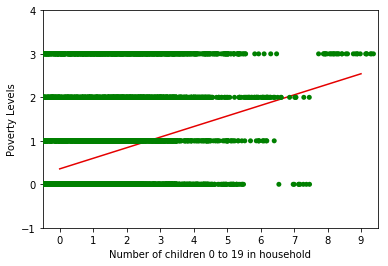

In [10]:
#poverty level increases as the no of childern in the age of 0-19 increases
regression(train.hogar_nin, train.Target,1, "xkcd:red", "green", 0.5)
plt.ylim(-1,4,1)
plt.ylabel("Poverty Levels")
plt.xlabel("Number of children 0 to 19 in household");

#### 2.4   Regression Analysis - Number of adults in household vs Poverty Levels

[1. 2.]
0.026850008297940153


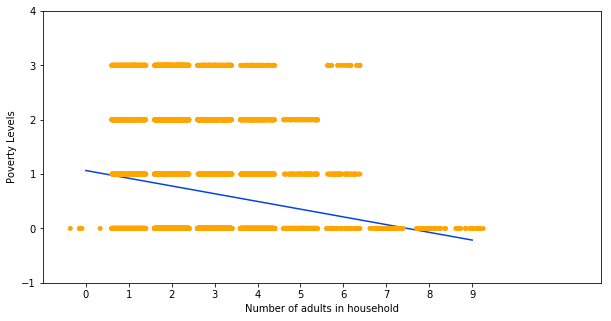

In [14]:
#poverty decreases as the number of adults increases
plt.figure(figsize = (10,5))
regression(train.hogar_adul, train.Target,1, "xkcd:blue", "orange", 0.4)
plt.ylim(-1,4,1)
plt.xlim(-1,12,1)
plt.ylabel("Poverty Levels")
plt.xlabel("Number of adults in household");

#### 2.5  Regression Analysis - Years of schooling vs Poverty Levels

[  1.  11. 121.]
0.09584178293997936


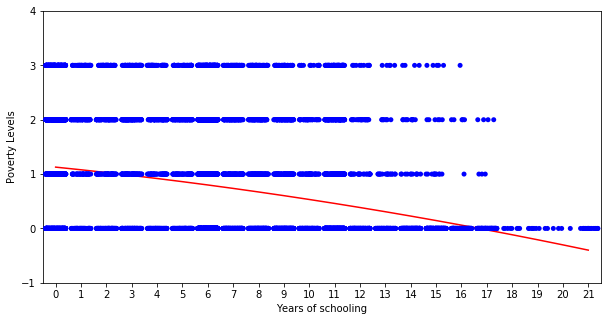

In [15]:
#as years of schooling more less is the poverty
#more educate the people less is the poverty
plt.figure(figsize = (10,5))
regression(train.escolari, train.Target,2, "red","blue", 0.4)
plt.ylim(-1,4,1)
plt.ylabel("Poverty Levels")
plt.xlabel("Years of schooling");

#### 2.6  Regression Analysis - No of people in House vs Poverty Levels

[ 1.  4. 16.]
0.0244644938934927


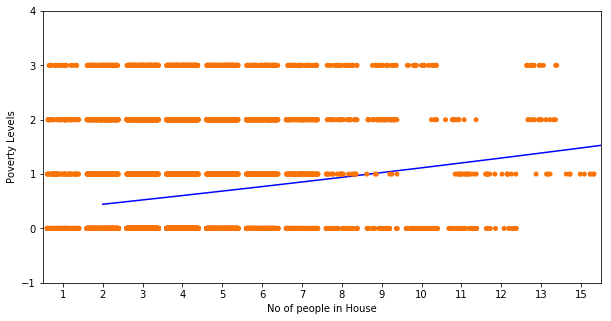

In [16]:
#poverty increases as no of persons living in the house increases
plt.figure(figsize = (10,5))
regression(train.tamviv, train.Target,2, "blue","xkcd:orange", 0.4)
plt.ylim(-1,4,1)
plt.ylabel("Poverty Levels")
plt.xlabel("No of people in House");

#### 2.7   Regression Analysis - No of Females in House vs Poverty Levels

[1. 2.]
0.030444456724247115


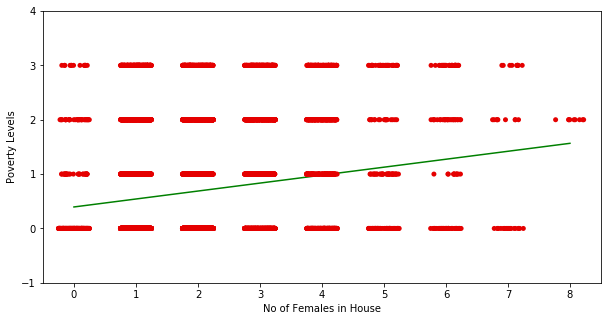

In [17]:
#poverty increases as no of females increases
plt.figure(figsize = (10,5))
regression(train.r4m3, train.Target,1, "green","xkcd:red", 0.25)
plt.ylim(-1,4,1)
plt.ylabel("Poverty Levels")
plt.xlabel("No of Females in House");

#### 2.8   Regression Analysis - Dependency rate vs Poverty Levels

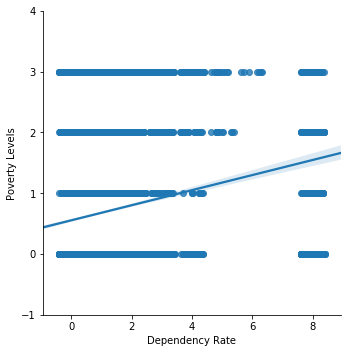

In [19]:
#dependency
sns.lmplot(x="dependency", y="Target", data=train, x_jitter=.4,  order =1)
plt.ylim(-1,4,1)
plt.xlabel("Dependency Rate");
plt.ylabel("Poverty Levels");